<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC1</p>
<p style="margin: 0; text-align:right;">2022-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos cómo aplicar diferentes técnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de un conjunto de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>Preprocesado de los datos</li>
  <li>Reducción de la dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>
   
**Importante:** Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, elegid en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Importante:** La solución planteada no debe utilizar métodos, funciones o parámetros declarados "deprecated" en futuras versiones.
   
Para la realización de la práctica necesitaremos las siguientes librerías:

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos: </strong>
Kevin Luna Obando
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# 1. Carga del conjunto de datos (1 punto)

A lo largo de esta práctica utilizaremos el conjunto de datos [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/forest+fires), el cual contiene información relevante acerca de distintos incendios acaecidos en el noreste de Portugal. Cada muestra del conjunto de datos estará formada por el área de bosque quemada y el valor de múltiples factores que podrían ser los detonantes o catalizadores del fuego. El conjunto de datos lo encontraréis en el siguiente enlace: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv.

Nota: para los ejercicios de esta PEC, utilizaremos como variable objetivo el "area": número de hectáreas afectadas por el incendio. El resto de variables del conjunto de datos conformarán los atributos descriptivos.

<div style="background-color: #EDF7FF;border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> cargad el conjunto de datos "Forest Fires Data Set" utilizando el método "read_csv" de "pandas" y mostrad:
<ul>
  <li>El número de filas (muestras) del conjunto de datos.</li>
  <li>El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo).</li>
  <li>Contrastad dichos atributos con los que se describen en la página web del conjunto de datos.</li>
  <li>Verificad si hay o no "missing values" y en qué columnas.</li>
</ul>
Sugerencia: separad el conjunto de datos original en las variables "X" (atributos descriptivos) e "y" (variable objetivo).
</div>

<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;background-color:#e6b3b8; padding: 0.5em;">
Usando el método "read_csv" cargamos el conjunto de datos "Forest FIres Data Set":
</div>

In [2]:
df = pd.read_csv('./forestfires.csv')

<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;padding: 0.5em;">
Separamos el dataset en dos subconjuntos: uno con las variables descriptivas (X) y otro con la variable objetivo (y).
</div>

In [3]:
# Selección de la columna de la variable objetivo
y = df['area']
# Selección las columnas de las variables descriptivas 
X = df.drop('area', axis=1)

<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;padding: 0.5em;">
Con el método "info" obtenemos información básica de un dataset.</div>

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB


<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;padding: 0.5em;">
EL dataset consta de 12 variables descriptivas con 517 registros cada una:
<ul>
  <li><strong>X - </strong>Coordenada espacial del eje x dentro del mapa del parque Montesinho: 1 a 9</li>
  <li><strong>Y - </strong>Coordenada espacial del eje y dentro del mapa del parque Montesinho: 2 a 9</li>
  <li><strong>month - </strong>Mes del año: 'ene' a 'dic'</li>
  <li><strong>day - </strong>Día de la semana: 'lun' a 'dom'</li>
  <li><strong>FFMC - </strong>Índice FFMC del sistema FWI: 18,7 a 96,20</li>
  <li><strong>DMC - </strong>Índice DMC del sistema FWI: 1.1 a 291.3</li>
  <li><strong>DC - </strong>Índice DC del sistema FWI: 7.9 a 860.6</li>
  <li><strong>ISI - </strong>Índice ISI del sistema FWI: 0.0 a 56.10</li>
  <li><strong>temp - </strong>Temperatura en grados Celsius: 2,2 a 33,30</li>
  <li><strong>RH - </strong>Humedad relativa en %: 15,0 a 100</li>
  <li><strong>wind - </strong>Velocidad del viento en km/h: 0,40 a 9,40</li>
  <li><strong>rain - </strong>Lluvia exterior en mm/m2 : 0,0 a 6,4</li>
</ul>
</div>

<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;padding: 0.5em;">
Verificamos si existen valores nulos en el dataset</div>

In [5]:
if df.isna().sum().sum() == 0: print("No se han ecnontrado valores nulos en el dataset.")
else: print("Existen valores nulos en el dataset.")

No se han ecnontrado valores nulos en el dataset.


# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF;border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico: 
<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calculad la frecuencia.</li>
      <li>Haced un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calculad estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
      <li>Haced un histograma.</li>
    </ul>
  <li>Variables geoespaciales:</li>
    <ul>
      <li>Haced un histograma bidimensional.</li>
    </ul>
</ul>
Sugerencia: podéis usar la librería "pandas" y sus funciones "describe" y "value_counts", así como las funciones "bar", "hist" y "hist2d" de matplotlib.
</div>

<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;padding: 0.5em;">
Lo primero que haremos será separar entre variables categóricas, numéricas y geoespaciales.</div>

In [6]:
# Variables categóricas
cat_cols = df.select_dtypes(include='object').columns.tolist()
# Variables numericas
num_cols = df.drop(['X','Y'], axis=1).select_dtypes(exclude='object').columns.tolist()
# Variables geoespaciales
geo_cols = df[['X','Y']].columns.tolist()

print("Variables categóricas:", *cat_cols)
print("Variables numéricas:", *num_cols)
print("Variables geoespaciales:", *geo_cols)

Variables categóricas: month day
Variables numéricas: FFMC DMC DC ISI temp RH wind rain area
Variables geoespaciales: X Y


<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;padding: 0.5em;">
Haremos el cálculo de frencuancias para las variables "month" y "day", usando el método "value_counts". Además haremos un gráfico de barras para cada variable categórica.</div>

In [7]:
# Calculo de frecuencias
for col in cat_cols:
    frecuencia = X[col].value_counts()
    print("\n",frecuencia)


 aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

 sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


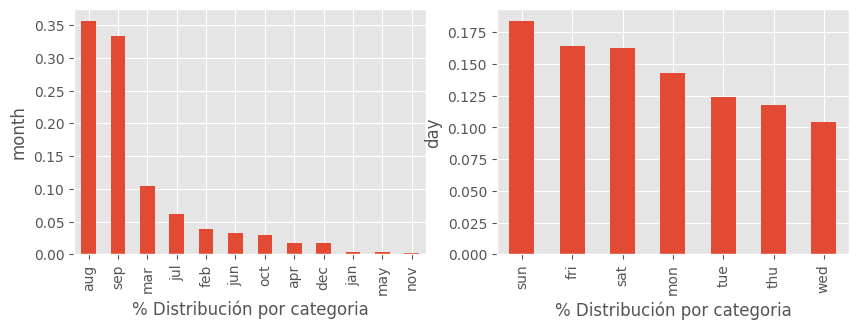

In [8]:
plt.figure(figsize=(10,7))
for i,col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    X[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% Distribución por categoria')
plt.show()

<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;background-color:#e6b3b8;padding: 0.5em;">
Con el método "describe()" calcularemos los estadísticos descriptivos básicos de las variables numéricas del dataset.</div>

In [9]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


<Figure size 600x400 with 0 Axes>

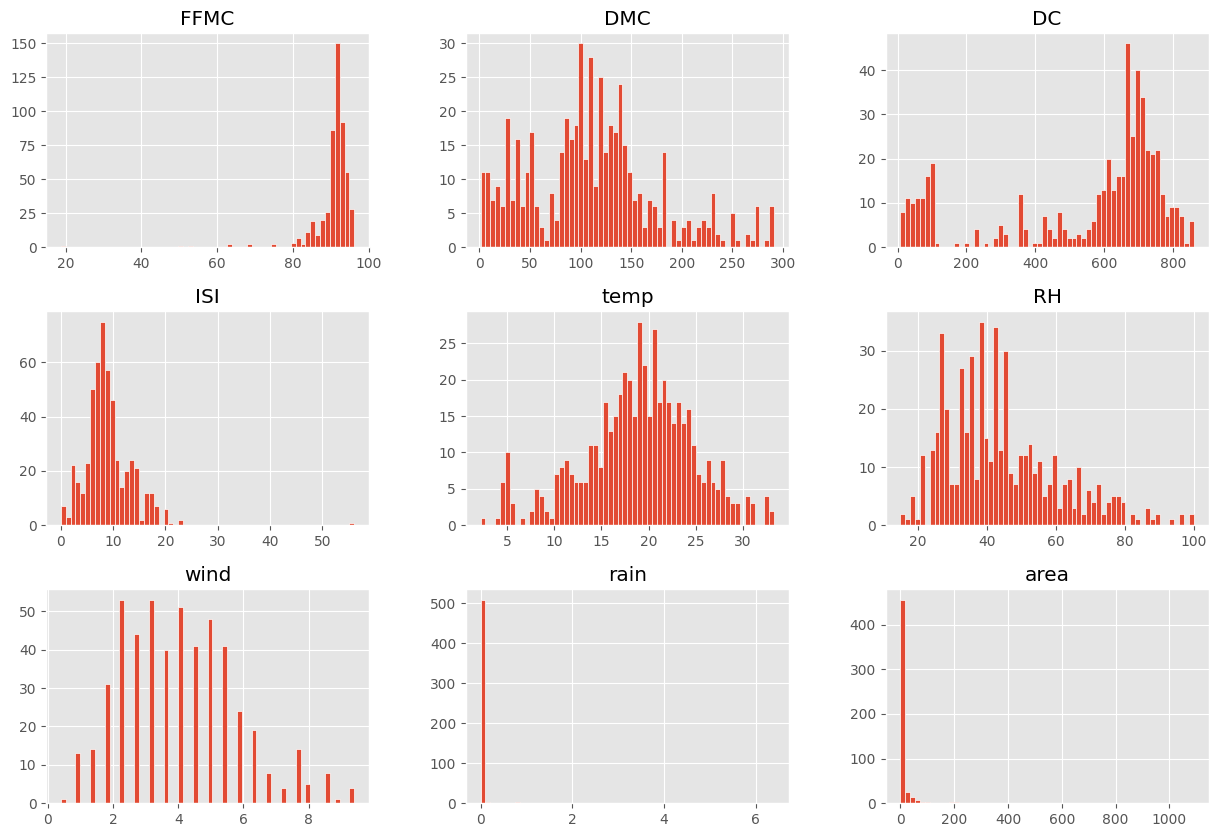

In [10]:
plt.figure(figsize=(6,4))
df[num_cols].hist(bins=60, figsize=(15,10), ec='w')
plt.show()

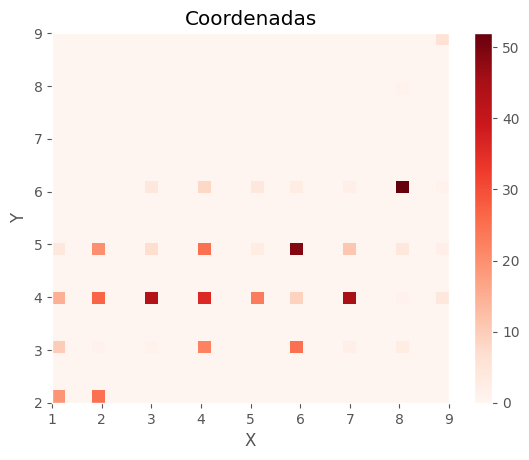

In [11]:
plt.hist2d(df['X'],df['Y'], bins=(30, 30), cmap='Reds')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Coordenadas')
plt.colorbar()
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;padding: 0.5em;">
<p>Sobre las <strong>variables categóricas</strong>: podemos observar que la gran mayoria de incendios se concentran en los meses de agosto y septiembre. Además, de que en noviembre, enero y mayo casi no ocurren incendios. Con respecto a los dias de la semana, hemos podido ver que los casos de incendios aumentar cuanto mas cerca esten del fin de semana, habiendo el pico en el domingo.</p>
<p>Sobre las <strong>variables numéricas</strong>: podemos observar una necesidad de estandarizar las variables ya que los valores muy distintos entre ellos. Ademas podemos observar que las variables "area", "FFMC", "ISI" y "rain" presentan outliers.</p>
<p>Por último, sobre las <strong>variables geoespaciales</strong>: no hemos podido observar ninguna tendencia clara, aunque se pude observar mucha concentración en la linia que uno las coordenas (0,0) y (8,6). Aunque en este caso es muy dificil sacar conclusiones clara sin antes conocer el parque.</p></div>

## 2.2 Análisis exploratorio de los datos

En este apartado exploraremos la relación de los atributos descriptivos con la variable objetivo.
<br>
Nota: trataremos de forma diferente los atributos categóricos de los numéricos

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada variable categórica, mostrad un gráfico donde superpondréis para cada categoría un histograma de los valores de la variable objetivo. Añadid una leyenda para saber a qué clase corresponde cada histograma
    
La finalidad es observar como se distribuye el valor de la variable objetivo en función de los valores de las categorías de cada variable categórica. De esta forma, identificaremos de manera visual y rápida si este atributo categórico está relacionado o no con diferentes valores de la respuesta.

<hr>
Sugerencia: podéis usar la función "hist" de la librería "matplotlib", así como su parámetro "alpha" (transparencia) para que se aprecien los histogramas superpuestos.
</div>

<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;padding: 0.5em;">
Al intentar realizar lo pedido mediante histogramas no se apreciaba lo pedido en el enunciado por lo que hemos decidido realizar un boxplot para cada mes. Además, como aún no se han tratado los outliers se ha ajustado el y-axis para apreciar mejor el boxplot.</div>

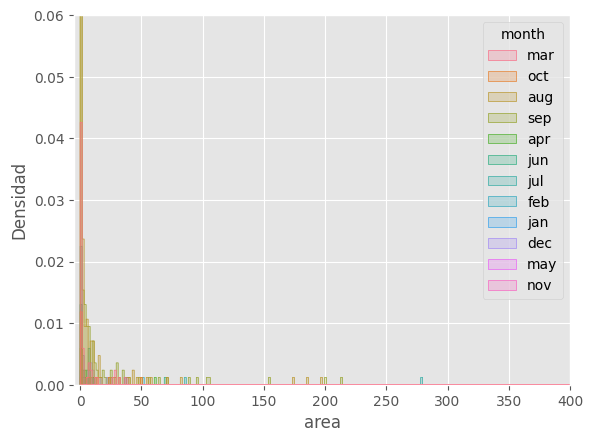

In [12]:
# Crear histogramas superpuestos con la opción 'hue'
sns.histplot(data=df, x="area", hue="month", element="step", stat="density")

# Configuraciones del gráfico
plt.xlabel('area')
plt.ylabel('Densidad')
plt.xlim([-5, 400]) # ajustar eje x entre -3 y 3
plt.ylim([0, 0.06]) # ajustar eje y entre 0 y 300
plt.show()

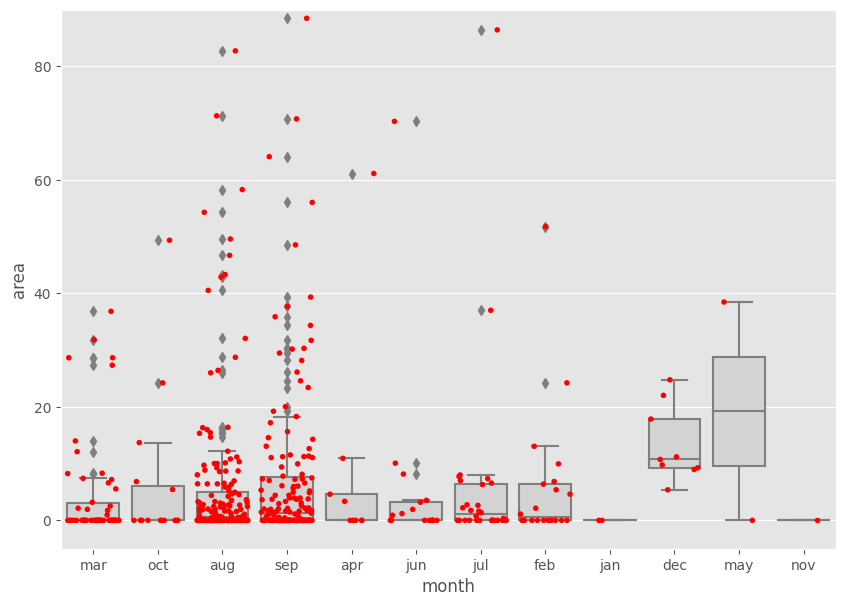

In [13]:
ax = plt.figure(figsize=(10,7))
ax = sns.boxplot(x='month', y='area', data=df, color='lightgrey', )
ax = sns.stripplot(x='month', y='area', data=df, color='red', jitter=0.4, size=4)
ax.set_ylim(-5, 90)
plt.show()

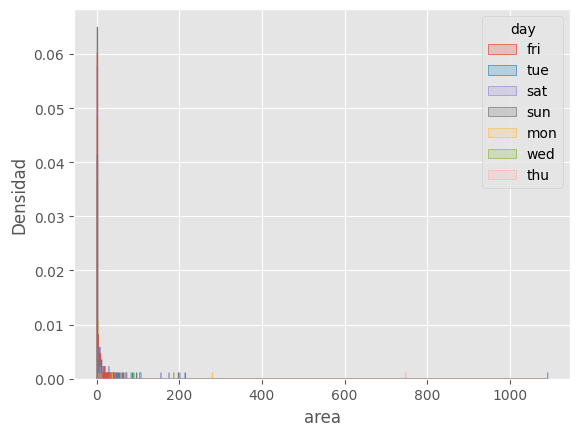

In [14]:
# Crear histogramas superpuestos con la opción 'hue'
sns.histplot(data=df, x="area", hue="day", element="step", stat="density")

# Configuraciones del gráfico
plt.xlabel('area')
plt.ylabel('Densidad')
plt.show()

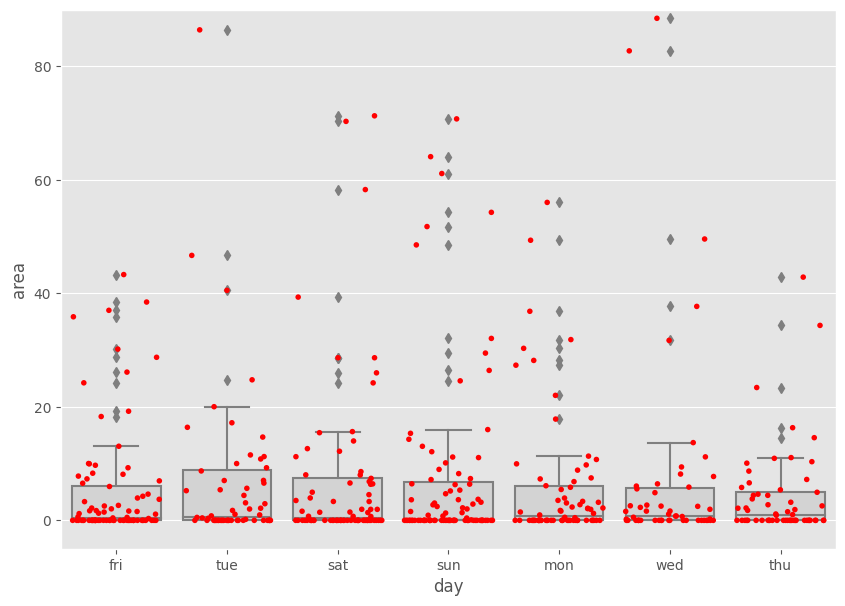

In [15]:
ax = plt.figure(figsize=(10,7))
ax = sns.boxplot(x='day', y='area', data=df, color='lightgrey', )
ax = sns.stripplot(x='day', y='area', data=df, color='red', jitter=0.4, size=4)
ax.set_ylim(-5, 90)
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando los histogramas, ¿te parece que los atributos categóricos tendrán algún peso a la hora de predecir la variable objetivo? ¿Porqué? 
</div>

<div style="border-color: #7C9DBF; border-left: 5px solid #e3091b; background-color:#e6b3b8;padding: 0.5em;">
Observando el gráfico resultado me parece que los atributos categóricos tendrán peso a la hora de predecir el area quemada del bosque. A simple vista podeos observar una relación entre el mes del año y el area quemada, por ejemplo en Diciembre los casos de incendios son pocos pero los daños suelen ser mas graves.</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada categoría de las variables categóricas calculad los valores de media y desviación estandard de la variable objetivo. La finalidad de este ejercicio es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
<hr>
Sugerencia: podéis usar las funciones "mean" y "std" de la librería "numpy".
</div>

In [16]:
# Agrupar los datos por mes
groupMonth = df[['month','area']].groupby('month')
# Calcular la media y la desviación estándar para cada grupo
statsMonth = groupMonth.agg({'area': ['mean', 'std']}).sort_values(('area', 'mean'),ascending=False)
statsMonth

area           
            mean        std
month                      
may    19.240000  27.209469
sep    17.942616  87.648175
jul    14.369687  50.849299
dec    13.330000   6.610747
aug    12.489076  60.364174
apr     8.891111  19.929092
oct     6.638000  13.699522
feb     6.275000  12.342510
jun     5.841176  16.884945
mar     4.356667   9.140107
jan     0.000000   0.000000
nov     0.000000        NaN

In [17]:
# Agrupar los datos por dia
groupsDay = df[['day','area']].groupby('day')
# Calcular la media y la desviación estándar para cada grupo
statsDay = groupsDay.agg({'area': ['mean', 'std']}).sort_values(('area', 'mean'),ascending=False)
statsDay

area            
          mean         std
day                       
sat  25.534048  122.698840
thu  16.345902   95.351052
tue  12.621719   33.568193
wed  10.714815   30.285914
sun  10.104526   26.076032
mon   9.547703   33.703562
fri   5.261647   10.012083

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre todos los atributos numéricos (incluyendo los geoespaciales) y la respuesta.
</div>

In [18]:
# Calculamos la matriz de correlación
X.corr(numeric_only=True)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000


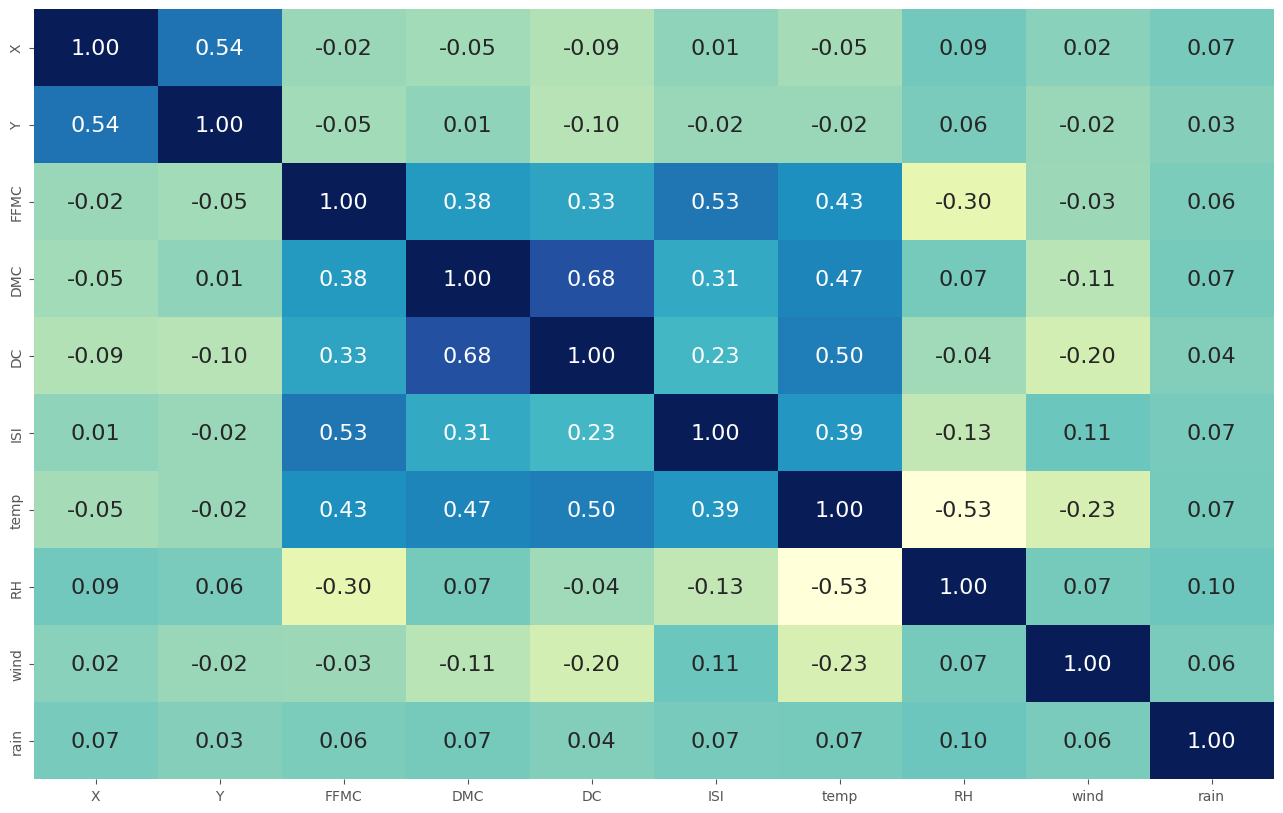

In [19]:
plt.figure(figsize =(16,10))
sns.heatmap(X.corr(numeric_only=True),annot=True,cmap='YlGnBu',fmt=".2f",cbar=False,annot_kws={'size':16})
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> representad gráficamente las relaciones entre todas las parejas de las variables numéricas del conjunto de datos (incluyendo las geoespaciales). La finalidad de este ejercicio es poder observar y analizar las correlaciones entre las variables de manera gráfica.
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn'.
</div>

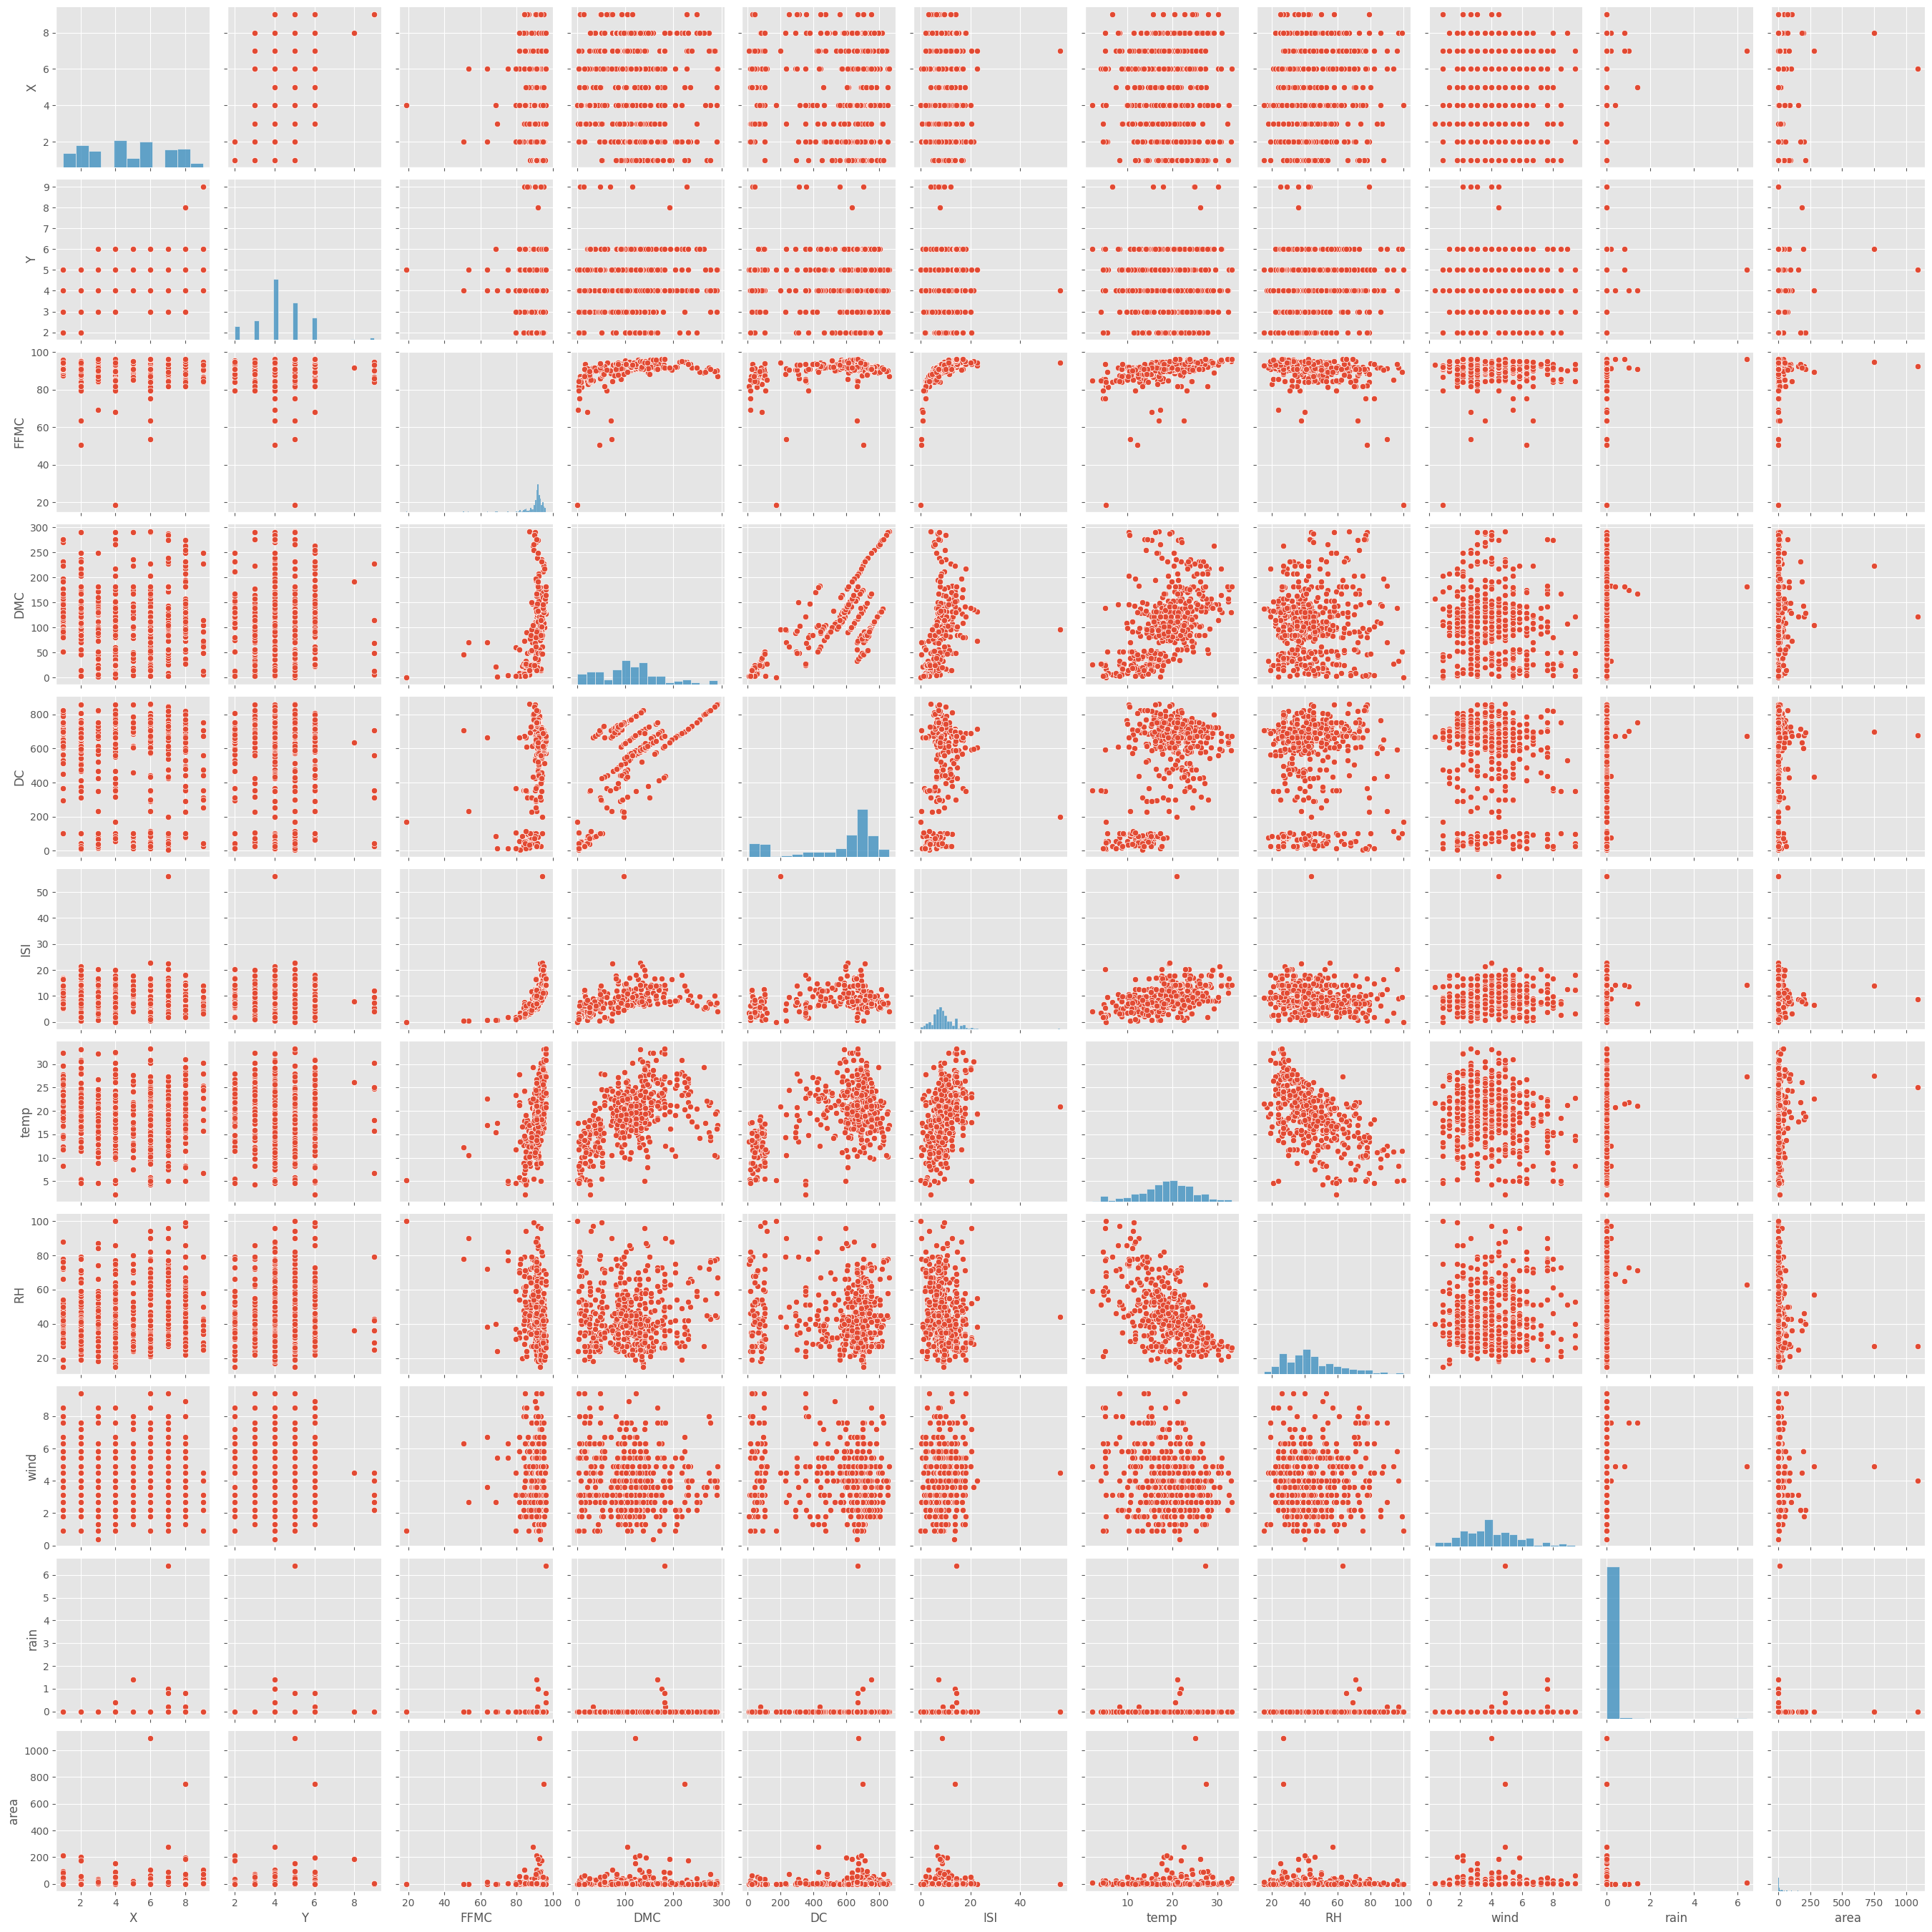

In [20]:
#visualizing relations of most related attributes
sns.pairplot(df)
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> identificad los 2 atributos que tienen una correlación más fuerte con la respuesta y los 3 con una correlación más débil (coeficiente de correlación mayor o menor en valor absoluto).
    
Para observar y analizar las correlaciones gráficamente, representad, para cada uno de los 5 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, en cada gráfico añadid la representación de una regresión lineal que fite los puntos.
        
<hr>Sugerencia: podéis usar la función "regplot" de la librería 'seaborn'.
</div>

In [21]:
df.corr(numeric_only=True)['area'].sort_values(ascending=False)

area    1.000000
temp    0.097844
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

Temperatura y humedad relativa son las variables con mas correlacion. Y las tres variables con menos correlación son: rain, ISI y wind.

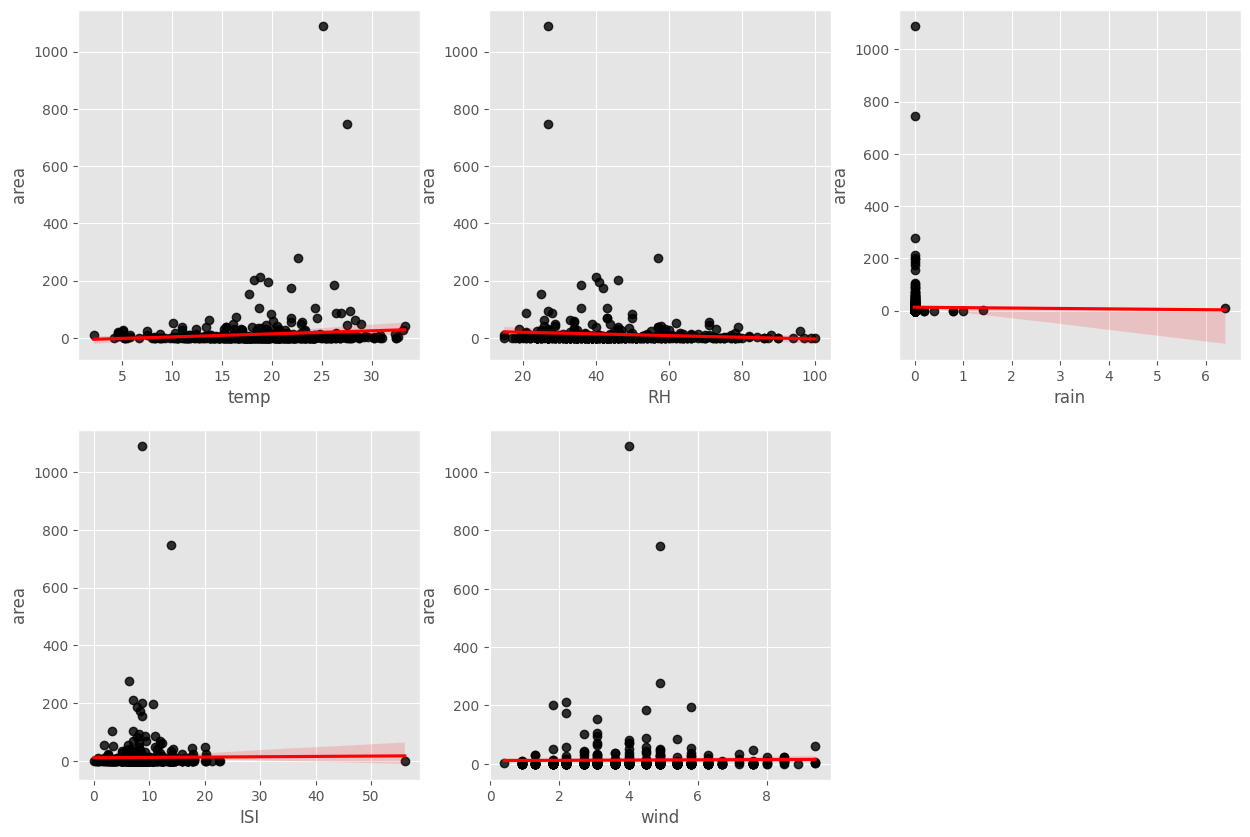

In [22]:
selected_col = ['temp','RH','rain','ISI','wind']
plt.figure(figsize=(15,10))
for i,col in enumerate(selected_col,1):
    plt.subplot(2,3,i)
    sns.regplot(data=df, x=col, y='area', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los gráficos, comentad brevemente si conseguís ver las altas o bajas correlaciones que habíais identificado numéricamente.
</div>

A nivel visual, no se aprecia ninguna correlacion lineal entre las variables y la varibale objetivo.

# 3. Preprocesado de los datos (3 puntos)

Una vez analizados los atributos descriptivos, es el momento de prepararlos para que nos sean útiles de cara a predecir valores. En este apartado:
<li>Transformaremos las variables categóricas en varias variables binarias, una para cada categoría.</li>
<li>Estandarizaremos los valores de los atributos descriptivos para que sus escalas no sean muy diferentes.</li>
<li>Separaremos el conjunto de datos original en dos subconjuntos: entrenamiento y test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> elimina los atributos categóricos del conjunto de datos y en su lugar introduce la transformación de dichos atributos a tantas variables binarias como categorías tengan.
<hr>
Sugerencia: utilizad la función "get_dummies" de "pandas".
</div>

In [23]:
# Obtenemos variables binarias para los atributos categóricos usando get_dummies
df_ = pd.get_dummies(df, columns=['month', 'day'])
#La eliminación de la primera columna se utiliza a menudo para evitar la colinealidad 
# perfecta entre las variables binarias, ya que la columna eliminada se puede deducir de las demás.
df_no_perfect_col = pd.get_dummies(df, columns=['month', 'day'],drop_first=True)

In [24]:
df_.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> estandariza todos los atributos descriptivos.
<hr>
Sugerencia: utilizad "StandardScaler" de "preprocessing".
</div>

In [25]:
# Variables descriptivas numericas
des_num_cols = df.drop(['area'], axis=1).select_dtypes(exclude='object').columns.tolist()
cat_col_dummies = df_.select_dtypes(include='uint8').columns.tolist()
# Aplicamos la estandarización a las variables numéricas
scaler = preprocessing.StandardScaler()
df_num_standarized = scaler.fit_transform(df_[des_num_cols])
# Convertimos las variables estandarizadas numéricas en un dataframe
df_numericas_estandarizadas = pd.DataFrame(df_num_standarized, columns=des_num_cols)
# Combinamos las variables estandarizadas numéricas con las variables categóricas originales
df_final = pd.concat([df_[cat_col_dummies], df_numericas_estandarizadas, df_['area']], axis=1)

In [26]:
df_final.head()

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.0
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.440925,1.383722,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0.0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.440925,1.383722,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0.0


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> separa los atributos descriptivos y la variable objetivo en los subconjuntos de entrenamiento y test.
<hr>
Sugerencia: para separar entre train y test podéis usar "train_test_split" de sklearn.<br>
</div>

In [27]:
# Separating the test and training set
X_ = df_final.drop(['area'], axis=1)
Y_=df_final['area']
train_x, test_x, train_y, test_y = train_test_split(X_,Y_, test_size=0.3, random_state = seed)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica si la decisión de transformar el conjunto de datos (variables categóricas y estandarización) antes de realizar la separación del conjunto de datos en los subconjuntos de entrenamiento y test es una buena idea.
</div>

Si se realiza la estandarización antes de la separación de los datos, se estaría utilizando información del conjunto de prueba para calcular la media y la desviación estándar de los datos. Esto puede llevar a una sobreestimación del rendimiento del modelo en el conjunto de prueba, ya que se habría utilizado información de este conjunto en el proceso de estandarización.
Por lo tanto, es importante que la estandarización se realice solo en el conjunto de entrenamiento, ya que esto asegura que el modelo se ajuste solo a la información presente en el conjunto de entrenamiento y no tenga información de los datos de prueba. Luego, la misma transformación de estandarización se puede aplicar al conjunto de prueba para mantener la consistencia en la escala y el rango de los datos.

# 4. Reducción de la dimensionalidad (2 puntos)

Con el propósito de comprobar visualmente la distribución de la variable objetivo teniendo en cuenta todos los atributos descriptivos a la vez, vamos a reducir la dimensionalidad del problema a solamente dos atributos que serán la proyección de los atributos descriptivos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplicad el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Generad un gráfico con el resultado del PCA en el que se muestre, en función de los valores de las dos componentes en los ejes x e y, el valor de la variable objetivo usando la escala de colores. El objetivo es visualizar la variación de la variable objetivo en función de los valores de las componentes principales generadas.</li>
</ul>
    
NOTA: cuidado, no incluyáis la variable objetivo en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.<br>
Sugerencia: utilizad el parámetro "norm=matplotlib.colors.LogNorm()" dentro del "scatter" para mostrar de forma logarítmica el área quemada de bosque.
</div>

In [40]:
# PCA del dataset original

pca = PCA(n_components=2)
df_pca = pd.DataFrame(data=pca.fit_transform(X_), columns=['C1', 'C2'],)
df_pca = pd.concat([df_pca, Y_], axis=1)

In [41]:
df_pca.head()

,C1,C2,area
0,3.409032,0.819739,0.0
1,0.302688,0.118169,0.0
2,0.531498,0.138492,0.0
3,3.154344,2.354018,0.0
4,2.780164,2.234393,0.0


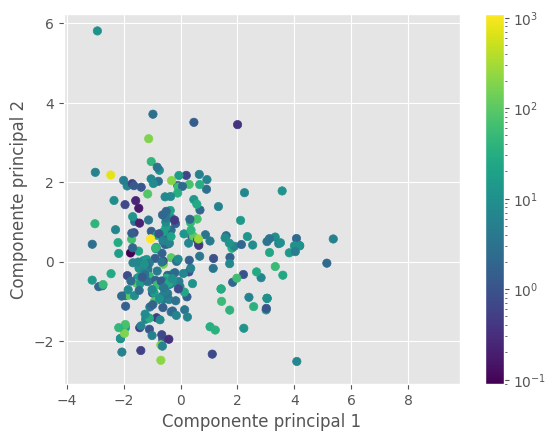

In [42]:
plt.scatter(df_pca['C1'], df_pca['C2'],norm=matplotlib.colors.LogNorm(), c=df['area'], cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar()
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Repetid la reducción de dimensionalidad, pero en este caso usando TSNE.  Podéis encontrar más información sobre este algoritmo en el link: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, generad un gráfico con el resultado del TSNE en el que se muestre, en función de los valores de las 2 nuevas dimensiones en los ejes x e y, el valor de la variable objetivo usando una escala de colores.</li>
</ul>

<hr>
Sugerencia: no es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: a parte de especificar el número de componentes, probad a usar los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.<br>
Sugerencia: utilizad el parámetro "norm=matplotlib.colors.LogNorm()" dentro del "scatter" para mostrar de forma logarítmica el área quemada de bosque.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los dos gráficos, ¿creéis que ha funcionado bien la reducción de dimensionalidad? ¿Os parece que las 2 nuevas dimensiones consiguen explicar la variación de la variable objetivo y visualizar diferenciadamente áreas de indendio grandes o pequeñas? ¿Si utilizásemos las 2 nuevas variables para predecir la variable objetivo, serían buenos los resultados obtenidos?
    
¿Por qué obtenemos resultados tan diferentes con los dos métodos?
</div>

# 5. Entrenamiento y test (1 punto)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Random Forest para regresión, con el objetivo de predecir la variable objetivo y evaluar la precisión obtenida con el modelo. Para ello:
<ul>
    <li>Entrenaremos el modelo con el conjunto de entrenamiento y veremos qué tal se comporta tanto con el subconjunto de entrenamiento como con el de test.</li>
    <li>Analizaremos si el resultado obtenido tiene sentido y veremos si se puede mejorar de alguna forma.</li>
</ul>
<br>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> usando el conjunto de datos preprocesado (variables categóricas y estandarización) sin aplicar reducción de la dimensionalidad:
<ul>
    <li>Definid un modelo Random Forest (fijando n_estimators=100 y random_state=seed).</li>
    <li>Mostrad la precisión del modelo tanto en el subconjunto de entrenamiento como de test.</li>
</ul>
<hr>
Sugerencia: para entrenar un modelo random forest podéis usar "RandomForestRegressor" de sklearn.<br>
Sugerencia: para mostrar la precisión del modelo podéis usar el método "score" del propio modelo.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica por qué la precisión del modelo sobre los valores de entrenamiento y test presentan esos valores.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> discutid qué técnicas podríais aplicar para mejorar la situación actual del modelo.
</div>